# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification problem, because the output (students who might need early intervention) is a discrete quantity, not a continuous value. We are classifying students who need early intervention and those who don't.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = pd.value_counts(student_data['passed'].values)[0]

# TODO: Calculate failing students
n_failed = pd.value_counts(student_data['passed'].values)[1]

# TODO: Calculate graduation rate
grad_rate = np.divide(float(n_passed), float(n_students))*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

print "\nF1 score for predicting all 'yes': {:.4f}".format(
    f1_score(y_true = ['yes']*n_passed + ['no']*n_failed, y_pred = ['yes']*n_students, pos_label='yes', average='binary'))

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
# To preserve the class imbalance, use the stratify parameter
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, test_size=95, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

Research (Ignore for Grading)
Gaussian Naive Bayes: Worked well with spam-filtering and document classification. Require a small amount of training data to estimate the necessary parameters. Learners and classifiers can be extremely fast. Each distribution can be independently estimated as a one dimensional distribution. It is known to be a bad estimator

Decision Trees: DTs are simple to understand and interpret; requires little data preparations; cost of using the tree is logarithmic; can handle both numerical and categorical data; can handle multi-output problems. Disadvantages include: don't generalize data well, unstable output, globally optimal decision tree is not guaranteed, can create biased trees if some classes dominate

Bagging: Can be used to reduce the variance of decision trees (using random subsets to fit classifiers)

Adaboost: Weights of incorrectly classfiied instances are adjusted to focus on difficult cases

RF: fits number of decision tree classifiers on various sub-samples and use averaging to improve the predictive accuracy and control over-fitting

GB: builds an additive models in a forward stage-wise fashion , allows for the optimization of arbitrary differentiable loss functions

KNN: sucessful in handwritten digit or satellite image scene detection. Successful in classification situations where the decision boundary is very irregular. 

SGDC: successful for large-scale and sparse ML problems in text classification and NLP. But it's sensitive to feature scaling. 

SVM: effective in high dimensional spaces, memory efficient, versatile, but if number of features is greater than number of samples, it's likely to give poor performances. SVMs also do not directly provide probability estimates --> need five-fold cv. 

Logistic Regression: assumes there is one smooth linear decision boundary. Fast implementation, works better if there's a single decision boundary. 

**Answer: ** I chose to explore GaussianNB, Random Forests, and SVM. 

GaussianNB, according to the sklearn documentation, worked well for spam-filtering and document classification. It requires a small amount of training data and classifiers can be learned extremely fast. However, it is also known to be a bad estimator. Knowing that we are training the model with 100, 200, and 300 training points, I wanted to see how GuassianNB will stack up to the other two training algorithms. I don't expect the decision boundary to be a simple one, so I wanted to use GaussianNB to quickly explore the training set. 

Random forests have been used extensively in the medical field, especially in bioinformatics (https://www.cs.cmu.edu/~qyj/papersA08/11-rfbook.pdf). Random forests are fast to train, but slow to create predictions (querying). Random forests combines bagging and random selection of features. Its advantages are that it is one of the most accurate learning algorithms available and runs efficiently on large databases. But it is also know to overfit for datasets with noisy classification tasks. I decided to use Random Forests, because think decision trees will work well to identify those who need early help (e.g. those who consume lots of workday alcohol, high absences, etc) and random forests can overcome the shortcomings of simple decision trees. 

Lastly, I chose SVM because it is a versatile algorithm. SVM are used in text categorization, image classification, and image recognition (Vapnik, V.: Invited Speaker. IPMU Information Processing and Management 2014). SVMs scales well to high dimensional data, training is relatively easy (no local optimal), and tradeoffs between classifier complexity and error can be controlled explicitly. However, it needs a good kernel function and SVMs don't directly provide probabiltiy estimates. I think SVM will be a good model for this dataset due to its versatility. Without knowing too much about the data, SVMs can handle linear or nonlinear datasets and provide a decent classification. 

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [7]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from random import shuffle

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=42)
clf_C = SVC(random_state=42)

# TODO: Set up the training set sizes
train_list = [100, 200, 300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
clf_list = [clf_A, clf_B, clf_C]

for i in clf_list:
    for j in train_list:
        train_predict(i, X_train[:j], y_train[:j], X_test, y_test)
        print "\n"

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0011 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.7752.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.6457.


Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0008 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.8060.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.7218.


Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0009 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.8134.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7761.


Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0430 seconds
Made predictions in 0.0063 seconds.
F1 score for training set: 0.9924.
Made predictions in 0.0063 seconds.
F1 score for test set: 0.7368.


Training a RandomForestClassifier using a training set size 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - GaussianNB  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0016             |         0.0003         |        0.7752    |       0.6457    |
| 200               |      0.0008             |         0.0003         |        0.8060    |       0.7218    |
| 300               |      0.0009             |         0.0003         |        0.8134    |    0.7761       |

** Classifer 2 - RandomForestClassifier 

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0551              |        0.0059          |      0.9924      |     0.7368      |
| 200               |     0.0358              |        0.0057          |      0.9885      |     0.6822      |
| 300               |     0.0320              |        0.0070          |      0.9975      |     0.7132      |

** Classifer 3 - SVM Classifier  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0015            |       0.0008           |      0.8354      |      0.8025     |
| 200               |       0.0036            |       0.0013           |      0.8431      |      0.8105     |
| 300               |       0.0060            |       0.0019           |      0.8664      |      0.8052     |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** The SVM classifier is the best model for this data set. The RandomForestClassifier gave relatively low F1 scores and showed some signs of overfitting (The F1 score for training data is significantly higher than testing data). Naive Gaussian Bayes had similar F1 scores as Random Forests, and from previous research it was noted that the estimators for Naive Gaussian Bayes cannot be always trusted. Thus, SVm with the highest F1 score seems to be the best option. Also, all of these algorithms run relatively fast, so cost and time will not be a significant factor (given that our data will not be really large). 

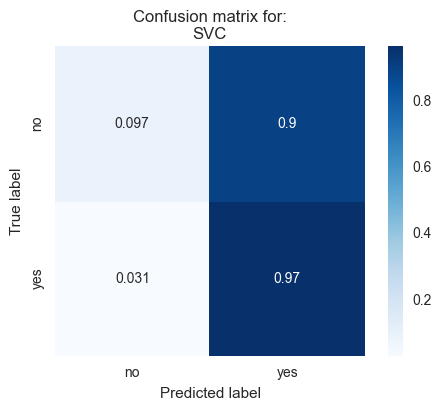

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Compute confusion matrix for a model
model = clf_C
cm = confusion_matrix(y_test.values, model.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** Support Vector Machines take in data about previous students with labled features (age, gender, family, etc) and uses them to create a decision boundary to separate those who likely will need early intervention and those who won't. In the training process, the algorithm tries to find the hyperplane (essentially a line or 2D plane) that will give the maximum distance between the positive (need early intervention) and negative (don't need early intervention) cases given all the labeled features. For example, consider the figure below: ![SVM](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png)

Here we see that the SVM algorithm is trying to maximize the distance between the positive and negative cases labeled blue and red. Then, once the algorithm finds this hyperplane (decision boundary), when we make a prediction, the algorithm takes in all the features and sees whether or not the data lies on one side of the decision boundary. For example, if the features determine that this student is near the red cases in the picture above, then SVM will predict that this student will likely need early intervention (if we set red = need early intervention).

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [13]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
C_range = np.logspace(-2, 2.5, 5)
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':C_range}

# TODO: Initialize the classifier
clf = SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')


# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "\nTuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

#from IPython.display import display
#display(pd.DataFrame(grid_obj.cv_results_))

Made predictions in 0.0036 seconds.

Tuned model has a training F1 score of 0.8267.
Made predictions in 0.0016 seconds.
Tuned model has a testing F1 score of 0.8026.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** The final model's F1 score for training is 0.8267 and for testing is 0.8026. The testing F1 score is slightly better (0.001) than the untuned model. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.